### In this notebook i performing some functions on the dataset  to fetching  more optimal result.

In [10]:
# Importing libraries that required in project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import math

## STEP1.  Loading dataset

In [4]:
tesla = pd.read_csv('TSLA.csv')

In [13]:
data_to_use = tesla['Close'].values

# Step2.  Checking dataset loaded or not.

In [14]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [17]:
data_to_use = tesla['Close'].values

In [19]:
print('Total number of days in the dataset: {}'.format(len(data_to_use)))

Total number of days in the dataset: 2416


In [24]:
tesla.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [25]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\deepb\AppData\Local\Temp\ipykernel_17312\3702129700.py:1: UserWarning: Parsing '29-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla['Date'])
C:\Users\deepb\AppData\Local\Temp\ipykernel_17312\3702129700.py:1: UserWarning: Parsing '30-06-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla['Date'])
C:\Users\deepb\AppData\Local\Temp\ipykernel_17312\3702129700.py:1: UserWarning: Parsing '13-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla['Date'])
C:\Users\deepb\AppData\Local\Temp\ipykernel_17312\3702129700.py:1: UserWarning: Parsing '14-07-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tesla['Date'] = pd.to_datetime(tesla['Date'])
C:\Users

In [26]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2020-10-01 00:00:00
Total days = 3920 days


In [27]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


<AxesSubplot:>

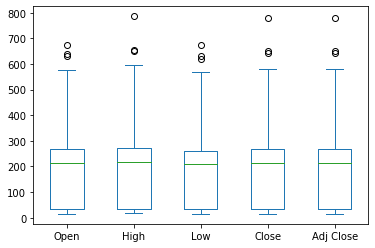

In [28]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

# step4. Plotting graphs 


In [31]:
iplot(plot)

NameError: name 'iplot' is not defined

In [32]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [33]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [34]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [21]:
scaler = StandardScaler()

In [23]:
scaled_dataset = scaler.fit_transform(data_to_use.reshape(-1, 1))


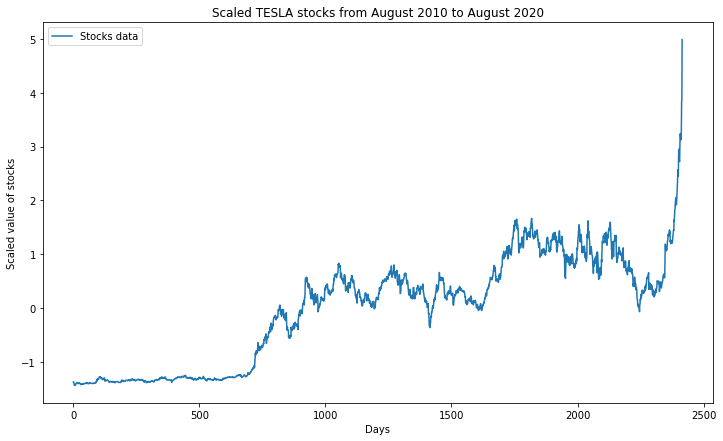

In [37]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled TESLA stocks from August 2010 to August 2020')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_dataset, label='Stocks data')
plt.legend()
plt.show()

In [26]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [27]:
X, y = window_data(scaled_dataset, 7)

In [28]:
X_train  = np.array(X[:700])
y_train = np.array(y[:700])

X_test = np.array(X[700:])
y_test = np.array(y[700:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (700, 7, 1)
y_train size: (700, 1)
X_test size: (1709, 7, 1)
y_test size: (1709, 1)


In [29]:
epochs = 200
batch_size = 7

In [33]:
class StockPredictionRNN(object):
    
    def __init__(self, learning_rate=0.001, batch_size=7, hidden_layer_size=512, number_of_layers=1, 
                 dropout=True, dropout_rate=0.8, number_of_classes=1, gradient_clip_margin=4, window_size=7):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, 1], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, 1], name='targets')

        cell, init_state = LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

# Step6.Prediciting stock price using sktlearn library.

In [38]:
tesla.reset_default_graph()
model = StockPredictionRNN()

AttributeError: 'DataFrame' object has no attribute 'reset_default_graph'

NameError: name 'sup' is not defined

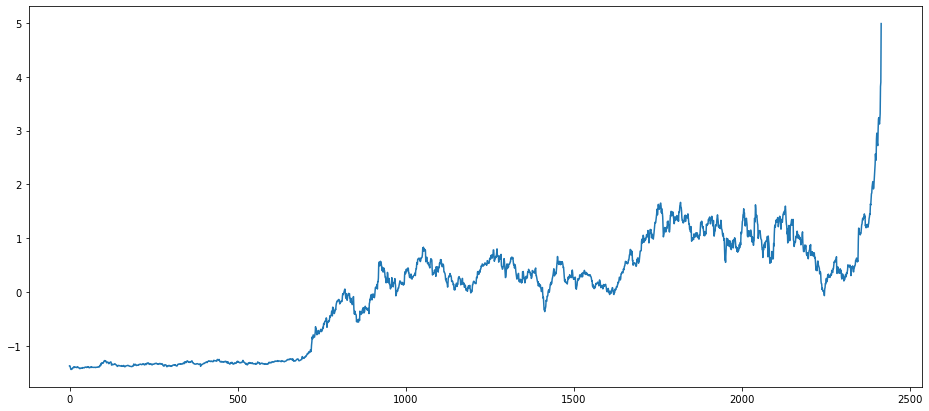

In [34]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_dataset, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

In [39]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.788228331751714	0.8024543287892049
MSE       3018.796360995388	2768.704187535219

